# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [76]:
import numpy as np
import pandas as pd
import sqlite3
print("Package load sucessful")

Package load sucessful


# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [87]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [98]:
sqlite_query = """
SELECT COUNT(*) 
from Policy_Table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [88]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [89]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [90]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [82]:
sqlite_query = """
SELECT "Product Name", AVG("Policy Value") as "Average Policy Value"
from Policy_Table
GROUP BY "Product Name"

"""

pd.read_sql(sqlite_query, conn)

,Product Name,Average Policy Value
0,CORPORATE MEMBERSHIP,5697.285714
1,FOCUSSED ISA,5746.341270
2,NHS PENSION,5241.500000
3,PRU BOND,4516.389831
4,PRUDENTIAL INVESTMENT PLAN,5084.515152
5,PRUDENTIAL ISA,5161.135593
6,RETIREMENT ACCOUNT,504964.959960
7,SIPP,5335.842466
8,STANDARD ANNUITY,NaN


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [83]:
sqlite_query = """
SELECT count(*)
FROM Policy_Table
WHERE ("Policy Start Date" >= '2017-01-01' and "Policy Start Date" <= '2017/03/31') AND "Customer ID" IN
(SELECT "Customer ID"
FROM Fund_Table
WHERE "Product Category" = "PENSION")
"""
pd.read_sql(sqlite_query, conn)

,count(*)
0,35


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [84]:
sqlite_query = """
WITH CTE AS(
    SELECT
        "Product Name",
        "Customer ID"
        ,"Date"
        ,"Policy_Value_Snapshot"
        ,ROW_NUMBER() OVER (PARTITION BY "Product Name" ORDER BY Date ASC) AS rnAsc
        ,ROW_NUMBER() OVER (PARTITION BY "Product Name" ORDER BY Date DESC) AS rnDesc
    FROM Fund_Table
)
SELECT
    "Customer ID",
    "Product Name",
    SUM(CASE WHEN rnAsc = 1 THEN "Policy_Value_Snapshot" ELSE -"Policy_Value_Snapshot" END) AS diff
FROM CTE
WHERE
    rnAsc = 1
    OR rnDesc = 1
GROUP BY "Product Name"
ORDER BY diff DESC;

"""

pd.read_sql(sqlite_query, conn)

,Customer ID,Product Name,diff
0,CO449550,CORPORATE MEMBERSHIP,22670.814815
1,CO143604,NHS PENSION,20911.175258
2,CO580314,PRUDENTIAL INVESTMENT PLAN,18827.260870
3,CO88500,PRUDENTIAL ISA,18547.173913
4,CO322312,FOCUSSED ISA,17533.200000
5,CO928817,PRU BOND,16480.834783
6,CO447389,SIPP,15042.704348
7,CO88500,RETIREMENT ACCOUNT,-484384.189189
8,CO210415,STANDARD ANNUITY,NaN


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [85]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)
print("Load sucessful")

Load sucessful


## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [60]:
#Insert your answer below:
#Invalid email check:
regex = '\S+@\S+'
Customer_Table['Email Check'] = Customer_Table['Email'].str.match(regex)
Customer_Table[Customer_Table['Email Check'] == False]

,index,Customer ID,Email,Gender,Age,Postcode,Email Check
121,121,CO609712,NOEMAIL,Male,81,None,False
337,337,CO795420,.,Female,68,680011,False
973,973,CO922481,CUSTOMER TO FOLLOW UP,Male,33,8340,False


In [73]:
filtered_df = Policy_Table[(Policy_Table['Customer ID'].isin(['CO609712','CO795420','CO922481']))]
print(filtered_df)

#Below observations for the three customers having invalid email address:
#1. All three have retirement accounts
#2. The person of 81 years of age does not have an email address and other customers have ambigious data in the column
#3. The customer CO609712 has the highest Policy value of the three and the customer CO922481 has 2 policies in his name.

      index Policy Number Customer ID Product Category        Product Name  \
174     174     RET100027    CO609712       RETIREMENT  RETIREMENT ACCOUNT   
271     271     RET100991    CO922481       RETIREMENT  RETIREMENT ACCOUNT   
644     644     RET100997    CO795420       RETIREMENT  RETIREMENT ACCOUNT   
1173   1173       ISA3952    CO609712              ISA        FOCUSSED ISA   
1270   1270       PXC1714    CO922481          PENSION                SIPP   

      Policy Value    Policy Start Date  
174       816287.0  2016-08-07 00:00:00  
271       274585.0  2016-11-06 00:00:00  
644        49384.0  2017-12-11 00:00:00  
1173         682.0  2014-05-23 00:00:00  
1270        9788.0  2011-01-04 00:00:00  


## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


In [101]:
# Insert your answer below: 
sqlite_query = """

SELECT 
	Customer_Table."Customer ID",
    Customer_Table."Gender",
    Customer_Table."Age",
    Policy_Table."Product Category",
    Policy_Table."Product Name",
    Policy_Table."Policy Value",
    Policy_Table."Policy Start Date"
FROM Customer_Table

INNER JOIN Policy_Table ON Customer_Table."Customer ID" = Policy_Table."Customer ID";



"""
vdf = pd.read_sql(sqlite_query, conn)
vdf

,Customer ID,Gender,Age,Product Category,Product Name,Policy Value,Policy Start Date
0,CO183683,Male,90,RETIREMENT,RETIREMENT ACCOUNT,744154.0,2017-12-27 00:00:00
1,CO314757,Female,90,ANNUITY,STANDARD ANNUITY,NaN,2013-05-21 00:00:00
2,CO314757,Female,90,RETIREMENT,RETIREMENT ACCOUNT,192389.0,2017-09-16 00:00:00
3,CO720602,Female,90,RETIREMENT,RETIREMENT ACCOUNT,904394.0,2018-08-11 00:00:00
4,CO34804,Female,90,ANNUITY,STANDARD ANNUITY,NaN,2012-03-18 00:00:00
...,...,...,...,...,...,...,...
1630,CO340813,Male,22,ISA,FOCUSSED ISA,7176.0,2012-11-15 00:00:00
1631,CO340813,Male,22,RETIREMENT,RETIREMENT ACCOUNT,533501.0,2016-04-06 00:00:00
1632,CO403019,Female,22,RETIREMENT,RETIREMENT ACCOUNT,280107.0,2018-02-19 00:00:00
1633,CO274837,Male,20,ISA,PRUDENTIAL ISA,6740.0,2009-07-20 00:00:00


In [104]:
from matplotlib import pyplot as plt
%matplotlib inline

In [105]:
! pip install seaborn

In [106]:
import seaborn as sns

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

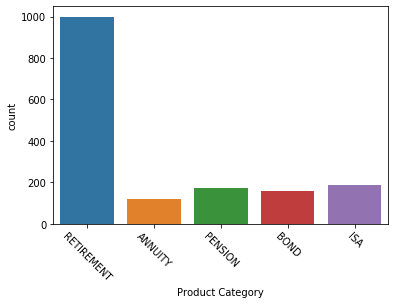

In [109]:
#The first Viz helps us understand the most popular Product Category

sns.countplot(x='Product Category', data = vdf)
plt.xticks(rotation = -45)

In [122]:
pd.set_option('display.float_format', '{:.2f}'.format)
df1 = vdf.groupby('Product Category')['Policy Value'].sum()
df1

Product Category
ANNUITY              0.00
BOND            769834.00
ISA            1028546.00
PENSION         919642.00
RETIREMENT   504459995.00
Name: Policy Value, dtype: float64

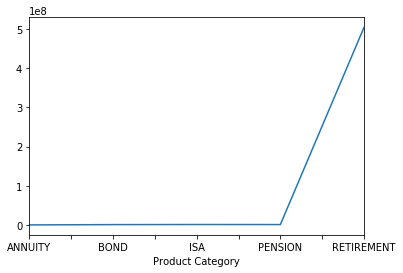

In [132]:
df1.plot(kind = "line")

Gender
Female   256836961.00
Male     250341056.00
Name: Policy Value, dtype: float64


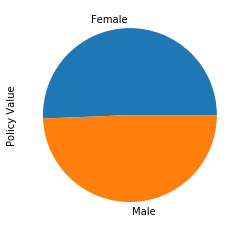

In [139]:
##Policy value based on Gender
df2 = vdf.groupby('Gender')['Policy Value'].sum()
print(df2)
df2.plot(kind = "pie")

Gender
Female    755
Male      758
Name: Policy Value, dtype: int64


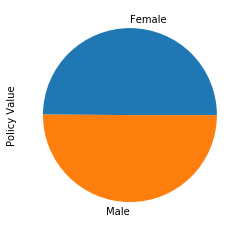

In [141]:
## Policy count based on gender
df3 = vdf.groupby('Gender')['Policy Value'].count()
print(df3)
df3.plot(kind = "pie")

C:\Users\prasadvi\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


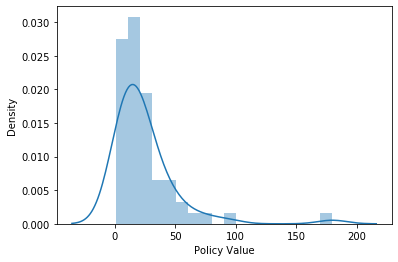

In [172]:
#Policy by age group

df4 = vdf.groupby('Age')['Policy Value'].count()
sns.distplot(df4, label=True)

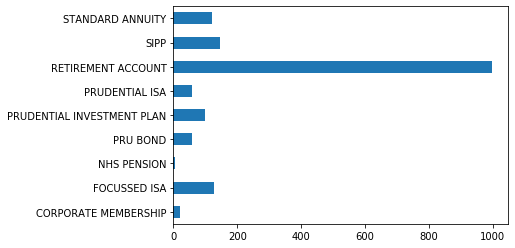

In [173]:
## Popular Product Name
vdf['Product Name'].value_counts().sort_index().plot.barh()

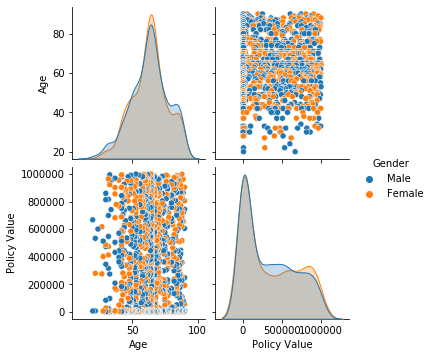

In [187]:
sns.pairplot(data=vdf, hue="Gender")

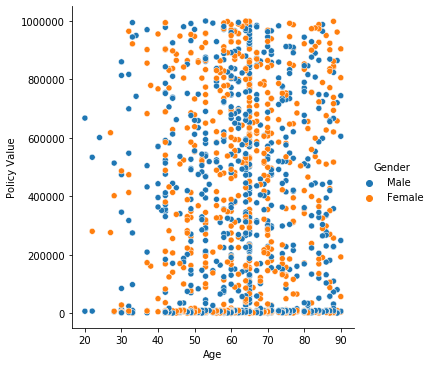

In [188]:
##Policy Value by Gender
sns.relplot(
    data=vdf,
    x="Age", y="Policy Value", hue="Gender"
)

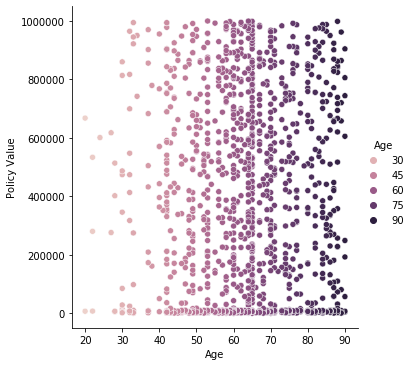

In [189]:
#Policy Value by Age

sns.relplot(
    data=vdf,
    x="Age", y="Policy Value", hue="Age"
)